# Tsunami Propagation and Forcing Analysis
This notebook demonstrates the generation of synthetic external forcing fields (wind stress, temperature, radiation, precipitation) and their effects on tsunami propagation.

We will:
1. Create and visualize synthetic external conditions.
2. Simulate tsunami propagation with and without external forcing.


## Import Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Define Domain and Create Forcing Fields
## 1. Generating External Forcing Fields
We create synthetic spatial and temporal fields for:
- Wind Stress (`uwind` and `vwind`)
- Air Temperature (`atemp`)
- Shortwave Radiation (`swdown`)
- Precipitation (`precip`)


In [14]:
# Define domain parameters
nx, ny = 60, 40            # Grid size: 60 x 40 grid points
nt = 24                    # Time steps (e.g., 24 hours for daily forcing)
x = np.linspace(0, 500, nx)  # 500 km domain
y = np.linspace(0, 500, ny)
t = np.linspace(0, 86400, nt)  # Time in seconds (1 day)

# Create 2D spatial grid
X, Y = np.meshgrid(x, y)

# Add a time dimension to spatial grids
X_3D = X[:, :, np.newaxis]  # Shape: (40, 60, 1)
Y_3D = Y[:, :, np.newaxis]  # Shape: (40, 60, 1)
T_3D = t[np.newaxis, np.newaxis, :]  # Shape: (1, 1, 24)

# 1. Wind Stress: Sinusoidal forcing in space and time
uwind = 0.1 * np.sin(2 * np.pi * X_3D / 500) * np.cos(2 * np.pi * T_3D / 86400)
vwind = 0.1 * np.cos(2 * np.pi * Y_3D / 500) * np.sin(2 * np.pi * T_3D / 86400)

# 2. Air Temperature: Constant field with small spatial gradient
atemp = 273 + 10 + 0.01 * X_3D  # 283K with a gradient

# 3. Shortwave Radiation: Sinusoidal diurnal cycle
swdown = 200 * (np.sin(2 * np.pi * T_3D / 86400) ** 2)
swdown[swdown < 0] = 0  # No negative values

# 4. Precipitation: Constant field
precip = np.full((ny, nx, nt), 1e-8)  # Small constant precipitation rate


## Visualize Forcing Fields


### Visualizing External Forcing Fields
Here we visualize:
1. Zonal Wind Stress (U)
2. Air Temperature
3. Shortwave Radiation (time series)
4. Precipitation


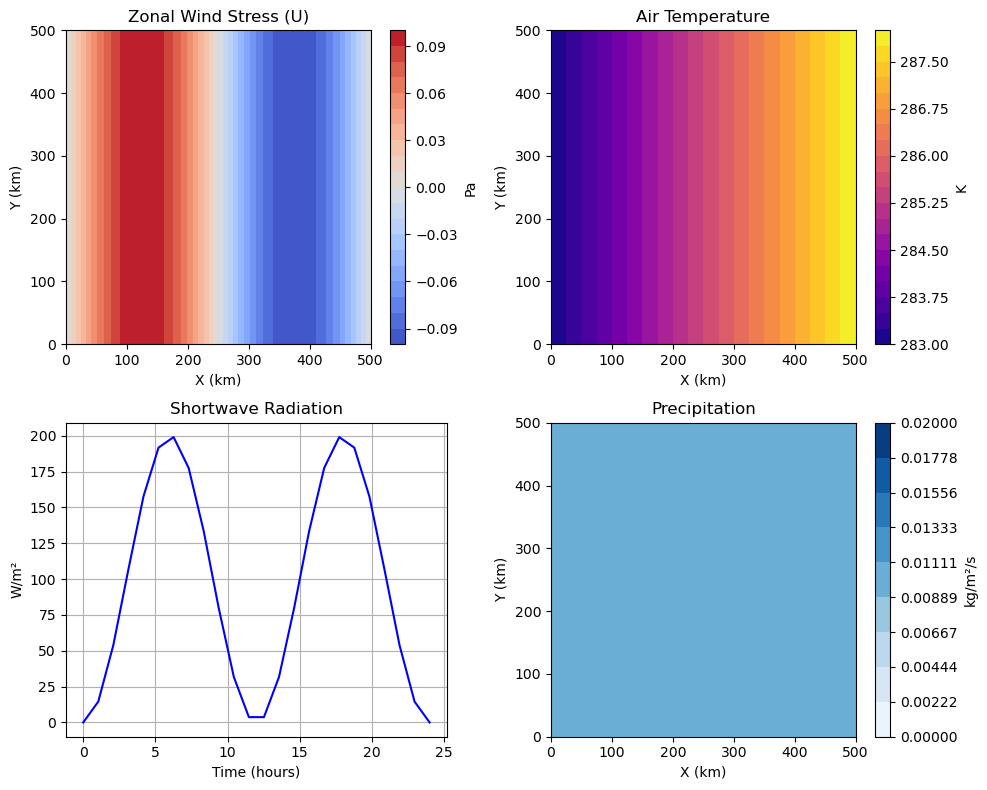

In [41]:
plt.figure(figsize=(10, 8))

# Zonal Wind Stress (U)
plt.subplot(2, 2, 1)
plt.title("Zonal Wind Stress (U)")
plt.contourf(X, Y, uwind[:, :, 0], cmap="coolwarm", levels=20)
plt.colorbar(label="Pa")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")

# Air Temperature
plt.subplot(2, 2, 2)
plt.title("Air Temperature")
plt.contourf(X, Y, atemp[:, :, 0], cmap="plasma", levels=20)
plt.colorbar(label="K")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")

# Shortwave Radiation
plt.subplot(2, 2, 3)
plt.title("Shortwave Radiation")
plt.plot(t / 3600, swdown[0, 0, :], label="SWDOWN", color="blue")
plt.xlabel("Time (hours)")
plt.ylabel("W/m²")
plt.grid()

# Precipitation (Fixed Color Scale and Levels)
plt.subplot(2, 2, 4)
plt.title("Precipitation")
plt.contourf(X, Y, precip[:, :, 0], cmap="Blues", levels=np.linspace(0, 0.02, 10))
plt.colorbar(label="kg/m²/s")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")

plt.tight_layout()
plt.show()


## Tsunami Simulation Setup
## 2. Tsunami Propagation Simulation
We simulate a baseline tsunami propagation and a perturbed version with a simple forcing term.


In [25]:
# Define domain parameters for tsunami simulation
nx, nt = 500, 100          # Grid points: space (nx), time (nt)
L = 500e3                  # Domain length (500 km)
H = 50                     # Ocean depth (m)
g = 9.81                   # Gravitational acceleration
c = np.sqrt(g * H)         # Tsunami wave speed (m/s)

# Grid: Space (x) and Time (t)
x = np.linspace(0, L, nx)       # Spatial grid
t = np.linspace(0, L / c, nt)   # Time grid
X, T = np.meshgrid(x, t)        # 2D grids for space and time

# Baseline Tsunami: Sinusoidal SSH
k = 2 * np.pi / L               # Wave number
omega = c * k                   # Angular frequency
SSH_baseline = 0.5 * np.sin(k * X - omega * T)

# Simplified Forcing: Small perturbation (same shape as SSH_baseline)
forcing = 0.05 * np.sin(2 * np.pi * X / L)  # Simple spatial forcing

# Combine Baseline SSH and Forcing
SSH_with_forcing = SSH_baseline + forcing


## Visualize Tsunami Propagation
### Tsunami Propagation Visualization
We compare:
- Baseline tsunami propagation.
- Tsunami propagation with simplified forcing.


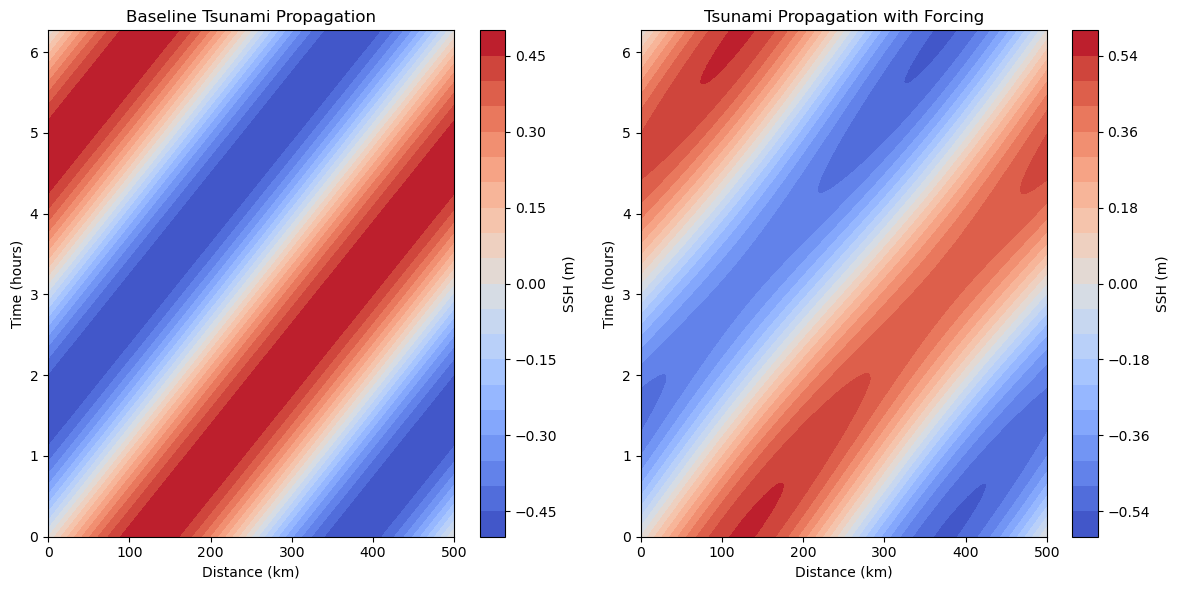

In [32]:
plt.figure(figsize=(12, 6))

# Baseline SSH
plt.subplot(1, 2, 1)
plt.contourf(x / 1e3, t / 3600, SSH_baseline, cmap="coolwarm", levels=20)
plt.colorbar(label="SSH (m)")
plt.title("Baseline Tsunami Propagation")
plt.xlabel("Distance (km)")
plt.ylabel("Time (hours)")

# SSH with Forcing
plt.subplot(1, 2, 2)
plt.contourf(x / 1e3, t / 3600, SSH_with_forcing, cmap="coolwarm", levels=20)
plt.colorbar(label="SSH (m)")
plt.title("Tsunami Propagation with Forcing")
plt.xlabel("Distance (km)")
plt.ylabel("Time (hours)")

plt.tight_layout()
plt.show()


## Analysis of Tsunami Propagation

The tur plots above visualize the propagation of a tsunami wave across a 500 km domain over a 6-hour period. The analysis compares:

1. **Baseline Tsunami Propagation (Left Panel)**:
   - The baseline wave is represented as a clean sinusoidal pattern.This wave develops naturally without any external forces and moves at a constant speed, which is calculated using the shallow-water wave speed formula (c = square root of g times H), where g is 9.81 meters per second squared and H is 50 meters.m} \).

2. **Tsunami Propagation with Forcing (Right Panel)**:
   - The external forcing introduces small perturbations to the wave structure.
   - This forcing results in slightly larger amplitudes (as seen from the color scale) and a minor distortion in the wave pattern.
   - The forcing mimics external effects such as wind stress or heating, which impact the sea surface height (SSH).

### Key Observations:
- The wave crests and troughs in the **baseline plot** are evenly spaced and symmetric, reflecting idealized propagation.
- In the **forcing plot**, the perturbations cause visible **amplitude changes** and slight shifts in the wave position over time.
- These changes demonstrate how external conditions can modify tsunami propagation in a simplified scenario.

This comparison highlights the sensitivity of tsunami dynamics s.ld ocean modeling.
